In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pytz

## Load and Preprocess Data

In [2]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_18144/3663648821.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


### Missing values

In [3]:
#Making a function to check for missing values, that can be called later on
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return 

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


In [4]:
# Drop rows with missing values
data = data.dropna() 

In [5]:
#Making a function to check for missing values, that can be called later on
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return 

check_missing_values(data)

Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


## Data preparation

In [6]:
# Convert timezone to UTC
# I have to convert the datetime to the same timezone, as there are too many different ones.
# Unique start and end time timezone combinations
#	PDT	PDT
#	PST	PST
#	PST	PDT
#	PDT	PST
#	UTC	PDT
#	UTC	PST
#	PDT	UTC
# Therefore, it would probably be best to convert to UTC first to calculate the hourly energy use and hourly charger occupation, 
# then switch back to US/Pacific for the day vs night and weekday vs weekend clustering analysis

# Map timezones: (pytz handles daytime savings)
tz_mapping = {
    'PDT': 'US/Pacific',
    'PST': 'US/Pacific',
    'UTC': 'UTC'
}

# Function for localizing timezone (adding it to datetime column)
def localize_to_timezone(row, datetime_col, tz_col):
    tz_name = row[tz_col]  # Get timezone string
    timezone = pytz.timezone(tz_mapping.get(tz_name))  # Map to pytz timezone string
    return row[datetime_col].tz_localize(timezone, ambiguous='NaT', nonexistent='NaT') # Localize datetime


In [7]:
# Convert 'Start Date' and 'End Date' to datetime with error handling
data.loc[:, 'Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data.loc[:, 'End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

# Apply the localization function to 'Start Date' and 'End Date'
data.loc[:, 'Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
data.loc[:, 'End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_18144/82330429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_18144/82330429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)


In [8]:
# Drop rows with non-existent 'spring forward' datetimes and those with ambiguous 'fall back' datetimes
data = data.dropna()

In [9]:
# Convert to UTC
data['Start Date UTC'] = pd.to_datetime(data['Start Date Localized'], utc=True)
data['End Date UTC'] = pd.to_datetime(data['End Date Localized'], utc=True)

In [10]:
# Step 1: Converting Charging Time and Total Duration to minutes:
data['Total Charging Time (min)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)']).dt.total_seconds() / 60
data['Total Duration (min)'] = pd.to_timedelta(data['Total Duration (hh:mm:ss)']).dt.total_seconds() / 60

In [11]:
# Step 2: Find charging per minute 'kWh per min'
data['kWh per min'] = data['Energy (kWh)'] / data['Total Charging Time (min)']

In [12]:
# Extra step: Add id column to original dataframe, so I don't have to copy all values in all rows:
data['unique_id'] = range(len(data))

In [13]:
# Step 3, 4, 5: 

# Function for counting the _ minutes. Used for charging and duration
def count_minutes(start_date, current_hour, total__time, minutes_):
    if (start_date.replace(minute=0, second=0) == current_hour):
        if ((60 - start_date.minute) > total__time):
            _min_in_hour = total__time
        else:
            _min_in_hour = 60 - start_date.minute
    elif ((minutes_ + 60) <= total__time):
        _min_in_hour = 60
    elif ((minutes_ + 60) > total__time):
        _min_in_hour = total__time - minutes_
    else:
        print("You missed something :P")
    return _min_in_hour

# Funtion for splitting events into multiple rows
def split_event_into_hours(row):
    start_date = row['Start Date UTC']
    end_date = row['End Date UTC']
    total_charging_time = row['Total Charging Time (min)']
    total_duration = row['Total Duration (min)']
    kWh_per_min = row['kWh per min']
    
    # Create a list of hours
    hourly_rows = []
    
    # Calculate minute totals
    minutes_charged = 0
    minutes_occupied = 0
    
    # Initialize current and iterate over all the hours
    current_hour = start_date.replace(minute=0, second=0)
    while current_hour < end_date:
        
        # Calculate minutes_in_hour
        charging_min_in_hour = count_minutes(start_date, current_hour, total_charging_time, minutes_charged)
        occupied_min_in_hour = count_minutes(start_date, current_hour, total_duration, minutes_occupied)
        
        # Calculate hourly energy consumption and charger occupation
        hourly_energy = charging_min_in_hour * kWh_per_min
        hourly_occupation = occupied_min_in_hour / 60  # Convert to hours
        
        # Append row
        hourly_rows.append({
            'Date UTC': current_hour,
            'Charging Time (min)': charging_min_in_hour,
            'Duration (min)': occupied_min_in_hour,
            'Hourly Energy Consumption (kWh)': hourly_energy,
            'Hourly Charger Occupation (h)': hourly_occupation,
            'Original Row ID': row['unique_id']
        })

        # Update counters
        minutes_charged += charging_min_in_hour
        minutes_occupied += occupied_min_in_hour

        # Move to the next hour
        current_hour += pd.Timedelta(hours=1)

    return pd.DataFrame(hourly_rows)

# Apply the function and create a new dataframe
new_data = pd.concat(data.apply(split_event_into_hours, axis=1).tolist(), ignore_index=True)

# Display the result

In [14]:
# Create new column with US/Pacific time
new_data['Date Pacific'] = new_data['Date UTC'].dt.tz_convert('US/Pacific')

In [15]:
# Create dummy for night and weekend

# Night: check if time is between 18 and 6
new_data['Is Night'] = ((new_data['Date Pacific'].dt.hour >= 18) | (new_data['Date Pacific'].dt.hour < 6)).astype(int)

# Weekend: check if day is 5 or 6, aka weekend
new_data['Is Weekend'] = new_data['Date Pacific'].dt.dayofweek.isin([5, 6]).astype(int)

In [ ]:
# Merge the dataframes.
merged_data = pd.merge(new_data, data, left_on='Original Row ID', right_on='unique_id', how='inner')

# Remove the unique_id column, as name is misleading, and the same information is in the Original Row ID column.
merged_data = merged_data.drop(columns=['unique_id'])

In [17]:
# Cluster day vs night

### cluster weekday vs weekend

In [18]:
#Converting to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'])  #Complete date and time
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')  #Complete date and time
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce') #Complete date and time
data['Total Duration (hh:mm:ss)'] = pd.to_datetime(data['Total Duration (hh:mm:ss)'], format='%H:%M:%S', errors = 'coerce').dt.time #Only time
data['Charging Time (hh:mm:ss)'] = pd.to_datetime(data['Charging Time (hh:mm:ss)'], format='%H:%M:%S').dt.time #Only time

In [19]:
#Converting Charging Time to hours
data['Charging Time (hours)'] = data['Charging Time (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
data['Total Duration (hours)'] = data['Total Duration (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [20]:
#Converting into hourly energy use
data['Energy (kWh/h)'] = data['Energy (kWh)']/data['Charging Time (hours)']

In [21]:
# Variable for day of week
data['Day of week'] = data['Start Date'].dt.dayofweek

In [22]:
# Ensure 'User ID' column exists
if 'User ID' not in data.columns:
	data['User ID'] = range(1, len(data) + 1)

data = data.set_index('User ID')
data

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Start Date UTC,End Date UTC,Total Charging Time (min),Total Duration (min),kWh per min,unique_id,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
523487,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 05:21:00,PDT,2016-08-01 06:49:00,PDT,2016-08-01 06:49:00,01:27:58,01:25:26,...,2016-08-01 12:21:00+00:00,2016-08-01 13:49:00+00:00,85.433333,87.966667,0.052259,0,1.423889,1.466111,3.135516,0
141845,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,2016-08-01 06:01:00,PDT,2016-08-01 10:58:00,PDT,2016-08-01 10:58:00,04:56:27,02:31:04,...,2016-08-01 13:01:00+00:00,2016-08-01 17:58:00+00:00,151.066667,296.450000,0.049655,1,2.517778,4.940833,2.979306,0
203603,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,2016-08-01 06:03:00,PDT,2016-08-01 09:15:00,PDT,2016-08-01 09:15:00,03:12:17,03:11:18,...,2016-08-01 13:03:00+00:00,2016-08-01 16:15:00+00:00,191.300000,192.283333,0.056935,2,3.188333,3.204722,3.416127,0
126575,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,2016-08-01 06:10:00,PDT,2016-08-01 08:54:00,PDT,2016-08-01 08:54:00,02:44:25,02:25:49,...,2016-08-01 13:10:00+00:00,2016-08-01 15:54:00+00:00,145.816667,164.416667,0.047788,3,2.430278,2.740278,2.867265,0
191743,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,2016-08-01 06:13:00,PDT,2016-08-01 09:33:00,PDT,2016-08-01 09:33:00,03:19:24,03:19:15,...,2016-08-01 13:13:00+00:00,2016-08-01 16:33:00+00:00,199.250000,199.400000,0.090031,4,3.320833,3.323333,5.401884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652881,PALO ALTO CA / CAMBRIDGE #5,0024:B100:0002:9B7F,City of Palo Alto,2020-12-31 15:51:00,PST,2020-12-31 17:30:00,PST,2020-12-31 17:31:00,01:38:27,01:21:36,...,2020-12-31 23:51:00+00:00,2021-01-01 01:30:00+00:00,81.600000,98.450000,0.031066,169401,1.360000,1.640833,1.863971,3
242661,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,03:43:01,02:14:04,...,2021-01-01 00:48:00+00:00,2021-01-01 04:31:00+00:00,134.066667,223.016667,0.095057,169402,2.234444,3.716944,5.703431,3
449995,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,17:28:14,05:08:12,...,2021-01-01 01:28:00+00:00,2021-01-01 18:56:00+00:00,308.200000,1048.233333,0.096252,169403,5.136667,17.470556,5.775146,3


#### Label Encoding

In [23]:
#Label Encoding
def label_encoding(df):
    le = LabelEncoder()
    for col in df.columns:
        # Check if column is of type 'object' and contains only strings
        if df[col].dtype == 'object' and all(isinstance(val, str) for val in df[col].dropna()):
            print(f"Encoding {col}")
            df[col] = le.fit_transform(df[col])
        else:
            pass
    return df

data = label_encoding(data)

Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone
Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By
Encoding County
Encoding Model Number


In [24]:
data = label_encoding(data)
data

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Start Date UTC,End Date UTC,Total Charging Time (min),Total Duration (min),kWh per min,unique_id,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
523487,7,22,0,2016-08-01 05:21:00,0,2016-08-01 06:49:00,0,2016-08-01 06:49:00,01:27:58,01:25:26,...,2016-08-01 12:21:00+00:00,2016-08-01 13:49:00+00:00,85.433333,87.966667,0.052259,0,1.423889,1.466111,3.135516,0
141845,8,24,0,2016-08-01 06:01:00,0,2016-08-01 10:58:00,0,2016-08-01 10:58:00,04:56:27,02:31:04,...,2016-08-01 13:01:00+00:00,2016-08-01 17:58:00+00:00,151.066667,296.450000,0.049655,1,2.517778,4.940833,2.979306,0
203603,7,22,0,2016-08-01 06:03:00,0,2016-08-01 09:15:00,0,2016-08-01 09:15:00,03:12:17,03:11:18,...,2016-08-01 13:03:00+00:00,2016-08-01 16:15:00+00:00,191.300000,192.283333,0.056935,2,3.188333,3.204722,3.416127,0
126575,13,23,0,2016-08-01 06:10:00,0,2016-08-01 08:54:00,0,2016-08-01 08:54:00,02:44:25,02:25:49,...,2016-08-01 13:10:00+00:00,2016-08-01 15:54:00+00:00,145.816667,164.416667,0.047788,3,2.430278,2.740278,2.867265,0
191743,14,17,0,2016-08-01 06:13:00,0,2016-08-01 09:33:00,0,2016-08-01 09:33:00,03:19:24,03:19:15,...,2016-08-01 13:13:00+00:00,2016-08-01 16:33:00+00:00,199.250000,199.400000,0.090031,4,3.320833,3.323333,5.401884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652881,11,36,0,2020-12-31 15:51:00,1,2020-12-31 17:30:00,1,2020-12-31 17:31:00,01:38:27,01:21:36,...,2020-12-31 23:51:00+00:00,2021-01-01 01:30:00+00:00,81.600000,98.450000,0.031066,169401,1.360000,1.640833,1.863971,3
242661,42,27,0,2020-12-31 16:48:00,1,2020-12-31 20:31:00,1,2020-12-31 20:32:00,03:43:01,02:14:04,...,2021-01-01 00:48:00+00:00,2021-01-01 04:31:00+00:00,134.066667,223.016667,0.095057,169402,2.234444,3.716944,5.703431,3
449995,21,57,0,2020-12-31 17:28:00,1,2021-01-01 10:56:00,1,2021-01-01 10:57:00,17:28:14,05:08:12,...,2021-01-01 01:28:00+00:00,2021-01-01 18:56:00+00:00,308.200000,1048.233333,0.096252,169403,5.136667,17.470556,5.775146,3


## Feature Engineering:

Prepare meaningful features for clustering. 

> Since the focus is on Model Number and Port Type, we need to represent these categorical variables numerically, whoch is done using one-hot encoding.

In [25]:
# One-hot encode 'Model Number' and 'Port Type'
one_hot_encoded_data = pd.get_dummies(data, columns=['Model Number', 'Port Type'])

# Exclude datetime columns before aggregation
datetime_columns = one_hot_encoded_data.select_dtypes(include=['datetime64']).columns
aggregated_data = one_hot_encoded_data.drop(columns=datetime_columns).groupby('User ID').sum(numeric_only=True)

# Display the first few rows of the feature-engineered dataset
print("Feature Engineered Dataset for Clustering:")
print(aggregated_data.head())

Feature Engineered Dataset for Clustering:
         Station Name  MAC Address  Org Name  Start Time Zone  End Time Zone  \
User ID                                                                        
151.0              36           78         0                0              0   
263.0             533          451         0               10             10   
433.0              44           28         0                0              0   
1166.0             40           20         0                1              1   
1380.0             16           48         0                2              2   

         Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
User ID                                                               
151.0          20.984             8.814                       2.634   
263.0         144.389            60.643                      18.123   
433.0           6.144             2.580                       0.771   
1166.0          5.238             2.200  

> One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The code above tells the algorithm that there is no ordinal relationship between the categories.

### Scaling:

In [26]:
# Exclude 'User ID' from scaling
features_to_scale = aggregated_data.drop(columns=['User ID'], errors='ignore')

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, index=aggregated_data.index, columns=features_to_scale.columns)

# Display the scaled dataset
print("Scaled Dataset for Clustering:")
print(scaled_data.head())

Scaled Dataset for Clustering:
         Station Name  MAC Address  Org Name  Start Time Zone  End Time Zone  \
User ID                                                                        
151.0       -0.194779    -0.157528       0.0        -0.299648      -0.299641   
263.0        0.680506     0.542574       0.0         0.791763       0.792271   
433.0       -0.180689    -0.251376       0.0        -0.299648      -0.299641   
1166.0      -0.187734    -0.266391       0.0        -0.190507      -0.190450   
1380.0      -0.230001    -0.213837       0.0        -0.081366      -0.081259   

         Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
User ID                                                               
151.0       -0.176040         -0.176034                   -0.176024   
263.0        0.309038          0.309035                    0.309107   
433.0       -0.234373         -0.234378                   -0.234375   
1166.0      -0.237935         -0.237934              

In [27]:
scaled_data.describe()

,Station Name,MAC Address,Org Name,Start Time Zone,End Time Zone,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,Plug Type,...,Model Number_2,Model Number_3,Model Number_4,Model Number_5,Model Number_6,Model Number_7,Model Number_8,Model Number_9,Port Type_0,Port Type_1
count,2.261800e+04,22618.000000,22618.0,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,...,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04,2.261800e+04
mean,-1.005278e-17,0.000000,0.0,-1.759236e-17,1.256597e-17,4.021110e-17,1.005278e-17,3.518471e-17,5.026388e-18,-9.424477e-18,...,-5.026388e-18,1.507916e-17,1.256597e-17,6.282985e-18,5.026388e-18,-1.256597e-17,-1.759236e-17,-7.539582e-18,-9.424477e-18,2.010555e-17
std,1.000022e+00,1.000022,0.0,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,...,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-2.581795e-01,-0.303930,0.0,-2.996484e-01,-2.996409e-01,-2.584847e-01,-2.584864e-01,-2.584923e-01,-2.798370e-01,-3.022256e-02,...,-1.256305e-01,-1.763034e-01,-7.318523e-02,-2.308870e-01,-2.507177e-01,-8.104166e-02,-8.309497e-02,-8.223276e-02,-3.022256e-02,-3.087340e-01
25%,-2.352847e-01,-0.262638,0.0,-2.996484e-01,-2.996409e-01,-2.364359e-01,-2.364366e-01,-2.364423e-01,-2.532368e-01,-3.022256e-02,...,-1.256305e-01,-1.763034e-01,-7.318523e-02,-2.308870e-01,-2.507177e-01,-8.104166e-02,-8.309497e-02,-8.223276e-02,-3.022256e-02,-2.673794e-01
50%,-2.141511e-01,-0.238237,0.0,-1.905072e-01,-1.904497e-01,-2.143675e-01,-2.143587e-01,-2.143610e-01,-2.532368e-01,-3.022256e-02,...,-1.256305e-01,-1.763034e-01,-7.318523e-02,-2.308870e-01,-1.787276e-01,-8.104166e-02,-8.309497e-02,-8.223276e-02,-3.022256e-02,-2.260247e-01
75%,-1.401834e-01,-0.136882,0.0,-8.136608e-02,-8.125854e-02,-1.503330e-01,-1.503360e-01,-1.503174e-01,-1.468361e-01,-3.022256e-02,...,-1.256305e-01,-1.763034e-01,-7.318523e-02,-1.055130e-01,-1.067375e-01,-8.104166e-02,-8.309497e-02,-8.223276e-02,-3.022256e-02,-1.433153e-01
max,3.551754e+01,26.157305,0.0,2.032803e+01,2.033749e+01,3.547507e+01,3.547514e+01,3.547523e+01,2.123971e+01,1.314740e+02,...,7.189084e+01,4.285831e+01,1.104726e+02,3.387083e+01,3.228881e+01,3.999497e+01,4.683631e+01,6.079358e+01,1.314740e+02,2.107164e+01


> The data is scaled so that the model can learn the patterns in the data. If the data is not scaled, the model may not learn the patterns in the data and may give a biased output.

---

# **Mandatory Component**
---

## **1: Cluster**

### **Model number and port type**

#### K-means for model numbers and port type

In [28]:
# Assuming 'aggregated_data' and 'scaled_data' were previously defined:
# Reapply K-Means clustering
optimal_k = 3  # Based on the elbow plot observation
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original aggregated dataset
aggregated_data['Cluster'] = clusters

# Analyze the clusters
cluster_summary = aggregated_data.groupby('Cluster').mean()

# Display the cluster summary
print("Clustered Data Sample:")
print(aggregated_data.head())

Clustered Data Sample:
         Station Name  MAC Address  Org Name  Start Time Zone  End Time Zone  \
User ID                                                                        
151.0              36           78         0                0              0   
263.0             533          451         0               10             10   
433.0              44           28         0                0              0   
1166.0             40           20         0                1              1   
1380.0             16           48         0                2              2   

         Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
User ID                                                               
151.0          20.984             8.814                       2.634   
263.0         144.389            60.643                      18.123   
433.0           6.144             2.580                       0.771   
1166.0          5.238             2.200                      

In [29]:
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
         Station Name  MAC Address  Org Name  Start Time Zone  End Time Zone  \
Cluster                                                                        
0           70.774688    85.756700       0.0         1.413271       1.412674   
1         1629.250708  1666.876771       0.0        29.144476      29.127479   
2         5193.216667  5140.500000       0.0        89.366667      89.325000   

         Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
Cluster                                                               
0           29.451458         12.369608                    3.696153   
1          786.398777        330.287482                   98.692901   
2         2421.331298       1016.959700                  303.877375   

         Port Number  Plug Type  ...  Model Number_2  Model Number_3  \
Cluster                          ...                                   
0           5.858526   0.008948  ...        0.187179        0.273082   
1        

> The output tells us that the data has been clustered into 3 clusters.
> The data has been clustered based on the Model Number and Port Type.

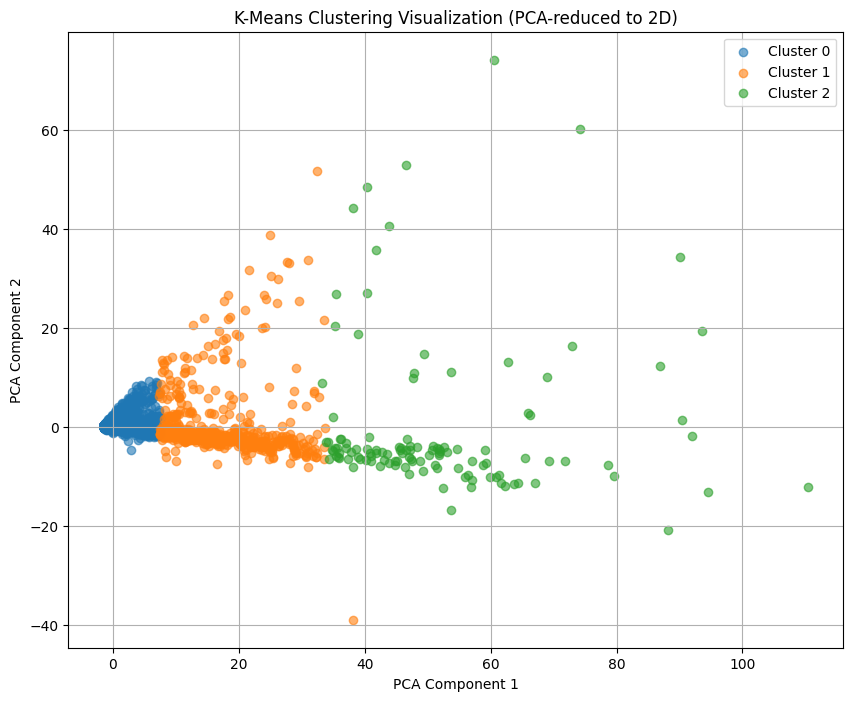

In [30]:
# Reduce the dimensions of the scaled data to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[aggregated_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

> The plot shows the data points in the clusters. The data points are represented by the dots in the plot. The different colors represent the different clusters. The centroids of the clusters are represented by the stars in the plot.

#### Inspect the Clusters:

Investigate the characteristics of each cluster by analyzing their Model Number and Port Type distributions (already calculated in the cluster summary).

In [31]:
# Analyze the characteristics of each cluster
cluster_characteristics = aggregated_data.groupby('Cluster').mean()

# Separate Model Number and Port Type distributions for inspection
model_number_columns = [col for col in cluster_characteristics.columns if col.startswith('Model Number')]
port_type_columns = [col for col in cluster_characteristics.columns if col.startswith('Port Type')]

model_number_distribution = cluster_characteristics[model_number_columns]
port_type_distribution = cluster_characteristics[port_type_columns]

print("Model Number Distribution by Cluster:")
print(model_number_distribution)

print('-' * 100)

print("\nPort Type Distribution by Cluster:")
print(port_type_distribution)

Model Number Distribution by Cluster:
         Model Number_0  Model Number_1  Model Number_2  Model Number_3  \
Cluster                                                                   
0              0.224165        0.141795        0.187179        0.273082   
1              3.796034        1.723796        3.543909        4.845609   
2             19.400000       10.916667        9.275000       13.016667   

         Model Number_4  Model Number_5  Model Number_6  Model Number_7  \
Cluster                                                                   
0              0.102652        0.956865        1.765235        0.064244   
1              1.147309       19.895184       36.616147        2.597734   
2              3.308333       56.291667      120.433333        5.066667   

         Model Number_8  Model Number_9  
Cluster                                  
0              0.059104        0.071311  
1              2.287535        2.392351  
2              5.183333        6.583333  


> The characteristics of each cluster have been analyzed by investigating their Model Number and Port Type distributions.
> The Model Number and Port Type distributions of the clusters have been calculated and displayed in the cluster summary.

<Figure size 1200x600 with 0 Axes>

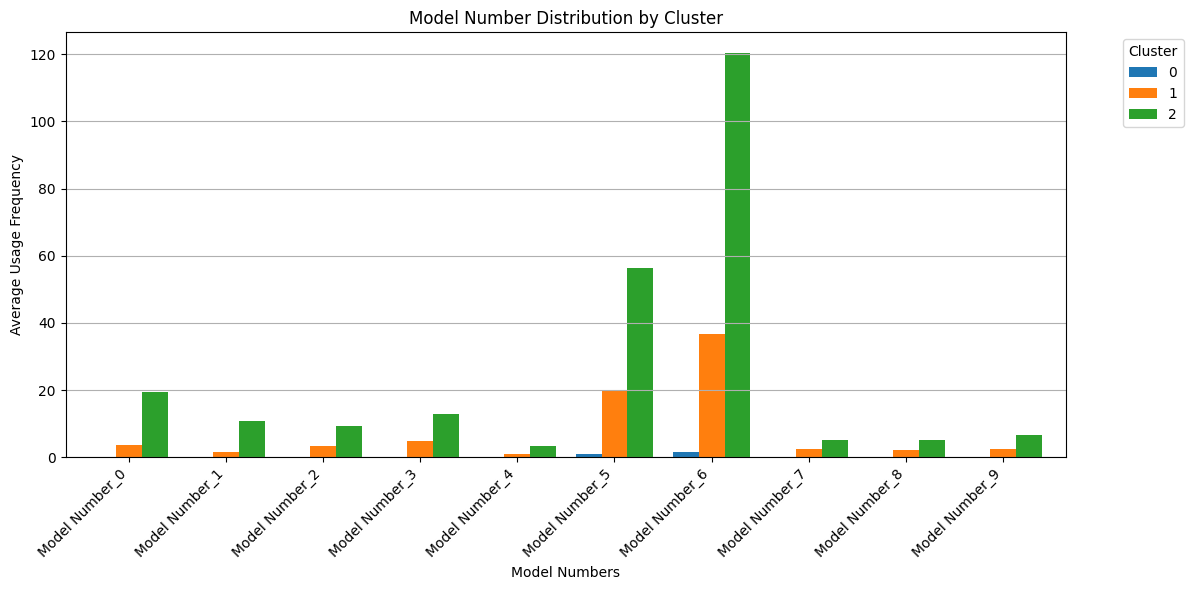

<Figure size 1200x600 with 0 Axes>

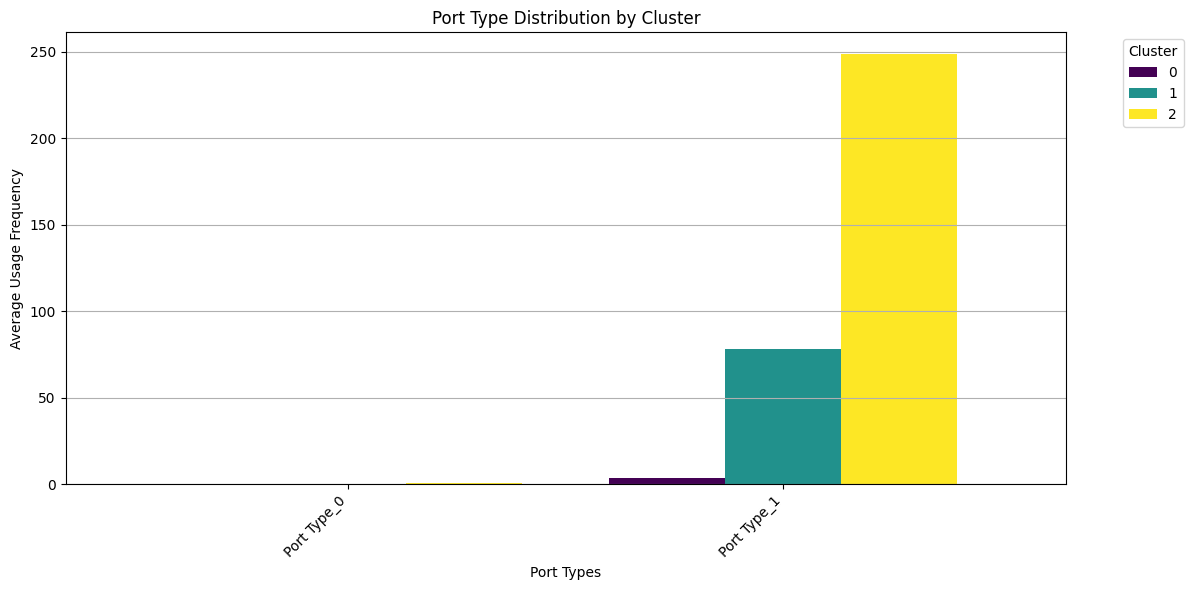

In [32]:
# Plot Model Number Distribution by Cluster
plt.figure(figsize=(12, 6))
model_number_distribution.T.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Model Number Distribution by Cluster')
plt.xlabel('Model Numbers')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Port Type Distribution by Cluster
plt.figure(figsize=(12, 6))
port_type_distribution.T.plot(kind='bar', figsize=(12, 6), width=0.8, colormap='viridis')
plt.title('Port Type Distribution by Cluster')
plt.xlabel('Port Types')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


What does the first plot tells? 
> The first plot shows the data points in the clusters. The data points are represented by the dots in the plot. The different colors represent the different clusters. The centroids of the clusters are represented by the stars in the plot.
> The data points in the plot are clustered based on the Model Number and Port Type.

What does the second plot tells?
> The second plot shows the Model Number and Port Type distributions of the clusters. The Model Number and Port Type distributions of the clusters have been calculated and displayed in the cluster summary.
> The Model Number and Port Type distributions of the clusters are displayed in the plot.

In [33]:
# Analyze the specific attributes and patterns for each cluster
cluster_profiles = aggregated_data.groupby('Cluster').mean()

# Identify significant Model Number and Port Type usage
significant_model_numbers = model_number_distribution.idxmax(axis=1)  # Model numbers with the highest average usage per cluster
significant_port_types = port_type_distribution.idxmax(axis=1)        # Port types with the highest average usage per cluster

# Generate cluster profiles
cluster_summary = []
for cluster in cluster_profiles.index:
    summary = {
        "Cluster": cluster,
        "Top Model Number": significant_model_numbers[cluster],
        "Top Port Type": significant_port_types[cluster],
        "Distinctive Features": cluster_profiles.loc[cluster].sort_values(ascending=False).head(5).to_dict()
    }
    cluster_summary.append(summary)

# Display cluster profiles
print("Cluster Profiles:")
for profile in cluster_summary:
    print(profile)

Cluster Profiles:
{'Cluster': 0, 'Top Model Number': 'Model Number_6', 'Top Port Type': 'Port Type_1', 'Distinctive Features': {'System S/N': 557930905054.5563, 'Plug In Event Id': 511332619.04653084, 'EVSE ID': 583107.1956222467, 'Postal Code': 362652.6335352423, 'Driver Postal Code': 360917.42653267254}}
{'Cluster': 1, 'Top Model Number': 'Model Number_6', 'Top Port Type': 'Port Type_1', 'Distinctive Features': {'System S/N': 11242493364995.326, 'Plug In Event Id': 9416064090.740793, 'EVSE ID': 10564510.050991502, 'Driver Postal Code': 7437420.954674221, 'Postal Code': 7435344.395184136}}
{'Cluster': 2, 'Top Model Number': 'Model Number_6', 'Top Port Type': 'Port Type_1', 'Distinctive Features': {'System S/N': 35202324088454.4, 'Plug In Event Id': 31247135197.833332, 'EVSE ID': 31094773.491666667, 'Driver Postal Code': 23570908.708333332, 'Postal Code': 23526105.733333334}}


#### Cluster Users Based on Broader Usage Patterns:
Expand your clustering analysis to include hourly energy use, charging duration, and frequency in addition to Model Number and Port Type.

In [34]:
# Fixing the Start Time and End Time columns to include accurate timestamps for clustering analysis

# Ensure the 'Start Time Zone' and 'End Time Zone' columns are strings
data['Start Time Zone'] = data['Start Time Zone'].astype(str)
data['End Time Zone'] = data['End Time Zone'].astype(str)

# Clean up problematic time zone formats by removing unrecognized abbreviations (e.g., PDT, PST)
data['Start Time Zone'] = data['Start Time Zone'].str.replace(r'PDT|PST|UTC', '', regex=True)
data['End Time Zone'] = data['End Time Zone'].str.replace(r'PDT|PST|UTC', '', regex=True)

# Combine Start Date and Start Time Zone into a proper datetime object
data['Start Time'] = pd.to_datetime(data['Start Date'].astype(str) + ' ' + data['Start Time Zone'], errors='coerce')
data['End Time'] = pd.to_datetime(data['End Date'].astype(str) + ' ' + data['End Time Zone'], errors='coerce')

# Verify the results
data[['Start Time', 'End Time']].head()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_18144/3487944731.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Start Time'] = pd.to_datetime(data['Start Date'].astype(str) + ' ' + data['Start Time Zone'], errors='coerce')
/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_18144/3487944731.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['End Time'] = pd.to_datetime(data['End Date'].astype(str) + ' ' + data['End Time Zone'], errors='coerce')


,Start Time,End Time
User ID,,
523487,NaT,NaT
141845,NaT,NaT
203603,NaT,NaT
126575,NaT,NaT
191743,NaT,NaT


In [35]:
# Create hourly time intervals and calculate energy usage per hour
data['Hour'] = data['Start Time'].dt.floor('h')  # Round start times to the nearest hour

# Calculate total energy usage grouped by User ID and Hour
hourly_energy_use = data.groupby(['User ID', 'Hour'])['Energy (kWh)'].sum().reset_index()

# Display the resulting hourly energy use data
hourly_energy_use.head()

,User ID,Hour,Energy (kWh)


In [36]:
# Calculate charging frequency by counting events per user per hour
charging_frequency = data.groupby(['User ID', 'Hour']).size().reset_index(name='Frequency')

# Display the resulting charging frequency data
charging_frequency.head()

,User ID,Hour,Frequency


In [37]:
# Calculate charging duration per hour for each user
# Convert 'Charging Time (hh:mm:ss)' to total hours
data['Charging Duration (hours)'] = data['Charging Time (hh:mm:ss)'].apply(
    lambda x: sum(int(part) * 60 ** i for i, part in enumerate(reversed(x.split(":")))) / 3600
    if isinstance(x, str) else 0
)

# Aggregate charging duration per user per hour
hourly_charging_duration = data.groupby(['User ID', 'Hour'])['Charging Duration (hours)'].sum().reset_index()

# Display the resulting hourly charging duration data
hourly_charging_duration.head()

,User ID,Hour,Charging Duration (hours)


In [38]:
# Combine hourly energy use, charging frequency, and charging duration into a single dataset
hourly_metrics = pd.merge(hourly_energy_use, charging_frequency, on=['User ID', 'Hour'], how='outer')
hourly_metrics = pd.merge(hourly_metrics, hourly_charging_duration, on=['User ID', 'Hour'], how='outer')

# Fill any missing values with zeros
hourly_metrics.fillna(0, inplace=True)

# Display the combined dataset
hourly_metrics.head()

,User ID,Hour,Energy (kWh),Frequency,Charging Duration (hours)


In [39]:
# Aggregate the hourly metrics at the User ID level by calculating the mean
user_level_metrics = hourly_metrics.groupby('User ID').mean().reset_index()

# Display the aggregated metrics at the User ID level
user_level_metrics.head()

,User ID,Hour,Energy (kWh),Frequency,Charging Duration (hours)


**Merge this data with Model Number and Port Type usage metrics to create the final dataset for clustering.**

In [40]:
# Aggregate Model Number and Port Type usage per User ID
model_port_usage = data.groupby(['User ID', 'Model Number', 'Port Type']).size().unstack(fill_value=0)

# Merge the aggregated hourly metrics with Model Number and Port Type usage
final_clustering_data = user_level_metrics.set_index('User ID').join(model_port_usage, how='outer').fillna(0)

# Display the final dataset prepared for clustering
final_clustering_data.head()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_18144/3477249328.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_clustering_data = user_level_metrics.set_index('User ID').join(model_port_usage, how='outer').fillna(0)


Hour  Energy (kWh)  Frequency  \
User ID Model Number                                  
151.0   3                0           0.0        0.0   
        5                0           0.0        0.0   
        6                0           0.0        0.0   
263.0   5                0           0.0        0.0   
        6                0           0.0        0.0   

                      Charging Duration (hours)  0   1  
User ID Model Number                                    
151.0   3                                   0.0  0   1  
        5                                   0.0  0   1  
        6                                   0.0  0   1  
263.0   5                                   0.0  0   3  
        6                                   0.0  0  15

In [41]:
# Ensure all columns in final_clustering_data are numeric
final_clustering_data_cleaned = final_clustering_data.apply(
    pd.to_numeric, errors='coerce'
).fillna(0)  # Replace NaNs with 0

# Display the cleaned dataset
final_clustering_data_cleaned.head()


Hour  Energy (kWh)  Frequency  \
User ID Model Number                                  
151.0   3                0           0.0        0.0   
        5                0           0.0        0.0   
        6                0           0.0        0.0   
263.0   5                0           0.0        0.0   
        6                0           0.0        0.0   

                      Charging Duration (hours)  0   1  
User ID Model Number                                    
151.0   3                                   0.0  0   1  
        5                                   0.0  0   1  
        6                                   0.0  0   1  
263.0   5                                   0.0  0   3  
        6                                   0.0  0  15

In [42]:
# Add a prefix to the Model and Port Type columns to differentiate them
model_port_usage = model_port_usage.add_prefix('Model_Port_')

In [43]:
# Merge the aggregated Model Number and Port Type data into the clustering DataFrame
final_clustering_data = final_clustering_data.join(model_port_usage, how='outer').fillna(0)

In [44]:
print(final_clustering_data.columns)

Index([                     'Hour',              'Energy (kWh)',
                       'Frequency', 'Charging Duration (hours)',
                                 0,                           1,
                    'Model_Port_0',              'Model_Port_1'],
      dtype='object')


In [45]:
# Convert all columns to numeric, replacing non-numeric values with NaN
final_clustering_data = final_clustering_data.apply(pd.to_numeric, errors='coerce').fillna(0)

# Verify the changes
print(final_clustering_data.dtypes)

Hour                           int64
Energy (kWh)                 float64
Frequency                    float64
Charging Duration (hours)    float64
0                              int64
1                              int64
Model_Port_0                   int64
Model_Port_1                   int64
dtype: object


**Scale the data to normalize the features before applying clustering algorithms.**

In [46]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_clustering_data = scaler.fit_transform(final_clustering_data)

# Verify the scaled data
print(scaled_clustering_data[:5])  # Display the first 5 rows of the scaled data

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

#### Apply K-Means Clustering

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters (n_clusters) if necessary
clusters = kmeans.fit_predict(scaled_clustering_data)

# Add cluster labels to the dataset
final_clustering_data_cleaned['Cluster'] = clusters

# Display the first few rows of the clustered dataset
final_clustering_data_cleaned.head()

Hour  Energy (kWh)  Frequency  \
User ID Model Number                                                 
0       Unknown       1350480211926605568      7.074323   1.038991   
102     Unknown       1389279600000000000      8.742773   1.000000   
107     CT4020-HD-GW  1389027927272727296      4.689244   1.000000   
        Unknown       1389027927272727296      4.689244   1.000000   
111     Unknown       1341915882352941056      6.933132   1.117647   

                      Charging Duration (hours)  Level 1  Level 2  Cluster  
User ID Model Number                                                        
0       Unknown                        2.095372        8      445        2  
102     Unknown                        2.724583        0        2        0  
107     CT4020-HD-GW                   1.403712        0        1        1  
        Unknown                        1.403712        1        9        1  
111     Unknown                        1.864967        1       18        1

In [ ]:
# Analyze the clusters by calculating the mean values for each feature per cluster
cluster_analysis = final_clustering_data_cleaned.groupby('Cluster').mean()

# Display the cluster analysis
cluster_analysis


,Hour,Energy (kWh),Frequency,Charging Duration (hours),Level 1,Level 2
Cluster,,,,,,
0,1.520244e+18,14.064604,1.019443,2.788292,0.062598,10.461659
1,1.509689e+18,5.473599,1.012404,1.273133,0.048877,3.805465
2,1.471625e+18,8.512089,1.011069,2.291109,15.057803,254.728324


#### Visualize Key Metrics Across Clusters

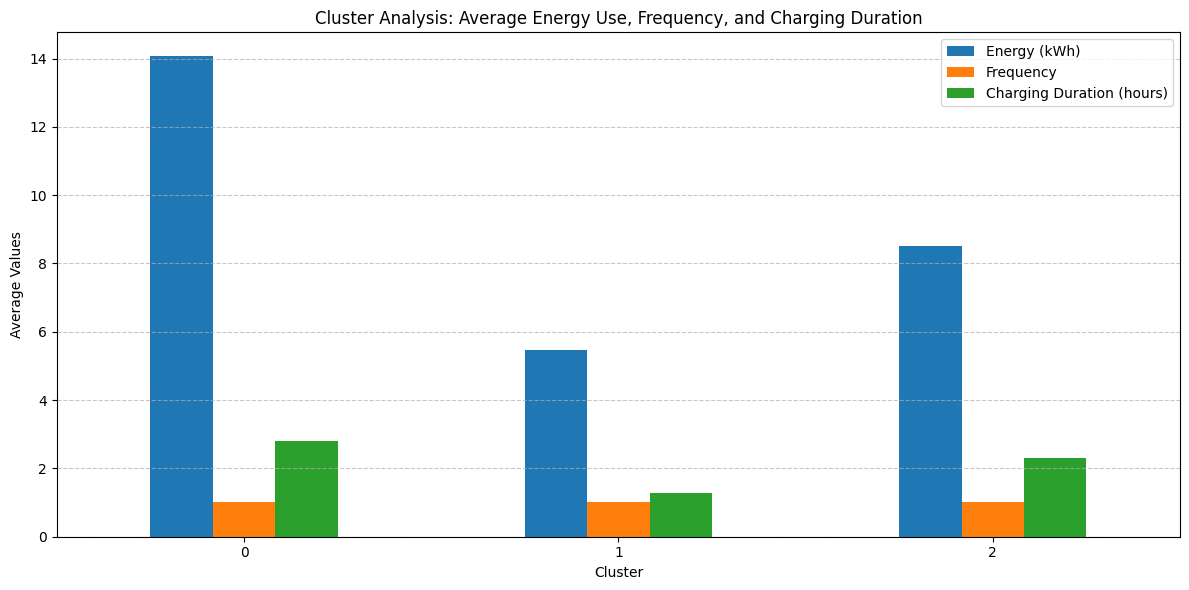

In [ ]:
# Visualize the average energy use, charging frequency, and charging duration per cluster
cluster_analysis[['Energy (kWh)', 'Frequency', 'Charging Duration (hours)']].plot(
    kind='bar',
    figsize=(12, 6),
    title='Cluster Analysis: Average Energy Use, Frequency, and Charging Duration',
    ylabel='Average Values',
    xlabel='Cluster'
)

# Adjust layout for better visibility
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What does this plot tells?
> 

#### Visualize Model Number and Port Type Distributions Across Clusters

In [ ]:
print(final_clustering_data.columns)
final_clustering_data['Cluster'] = clusters
print(final_clustering_data.head())
# Recreate the cluster-wise aggregation for Model Number and Port Type
model_port_columns = [col for col in final_clustering_data.columns if 'Model_Port' in col]
cluster_model_port_analysis = final_clustering_data.groupby('Cluster')[model_port_columns].mean()

# Confirm the structure again
print(cluster_model_port_analysis.info())
print(cluster_model_port_analysis.head())
print(len(clusters), len(final_clustering_data))
print(clusters[:10])

Index(['Hour', 'Energy (kWh)', 'Frequency', 'Charging Duration (hours)',
       'Level 1', 'Level 2', 'Model_Port_Level 1', 'Model_Port_Level 2'],
      dtype='object')
                                     Hour  Energy (kWh)  Frequency  \
User ID Model Number                                                 
0       Unknown       1350480211926605568      7.074323   1.038991   
102     Unknown       1389279600000000000      8.742773   1.000000   
107     CT4020-HD-GW  1389027927272727296      4.689244   1.000000   
        Unknown       1389027927272727296      4.689244   1.000000   
111     Unknown       1341915882352941056      6.933132   1.117647   

                      Charging Duration (hours)  Level 1  Level 2  \
User ID Model Number                                                
0       Unknown                        2.095372        8      445   
102     Unknown                        2.724583        0        2   
107     CT4020-HD-GW                   1.403712        0        

In [ ]:
print(cluster_model_port_analysis.info())  # Inspect the structure
print(cluster_model_port_analysis.head())  # Preview the data
cluster_model_port_analysis = cluster_model_port_analysis.apply(pd.to_numeric, errors='coerce').fillna(0)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model_Port_Level 1  3 non-null      float64
 1   Model_Port_Level 2  3 non-null      float64
dtypes: float64(2)
memory usage: 60.0 bytes
None
         Model_Port_Level 1  Model_Port_Level 2
Cluster                                        
0                  0.062598           10.461659
1                  0.048877            3.805465
2                 15.057803          254.728324


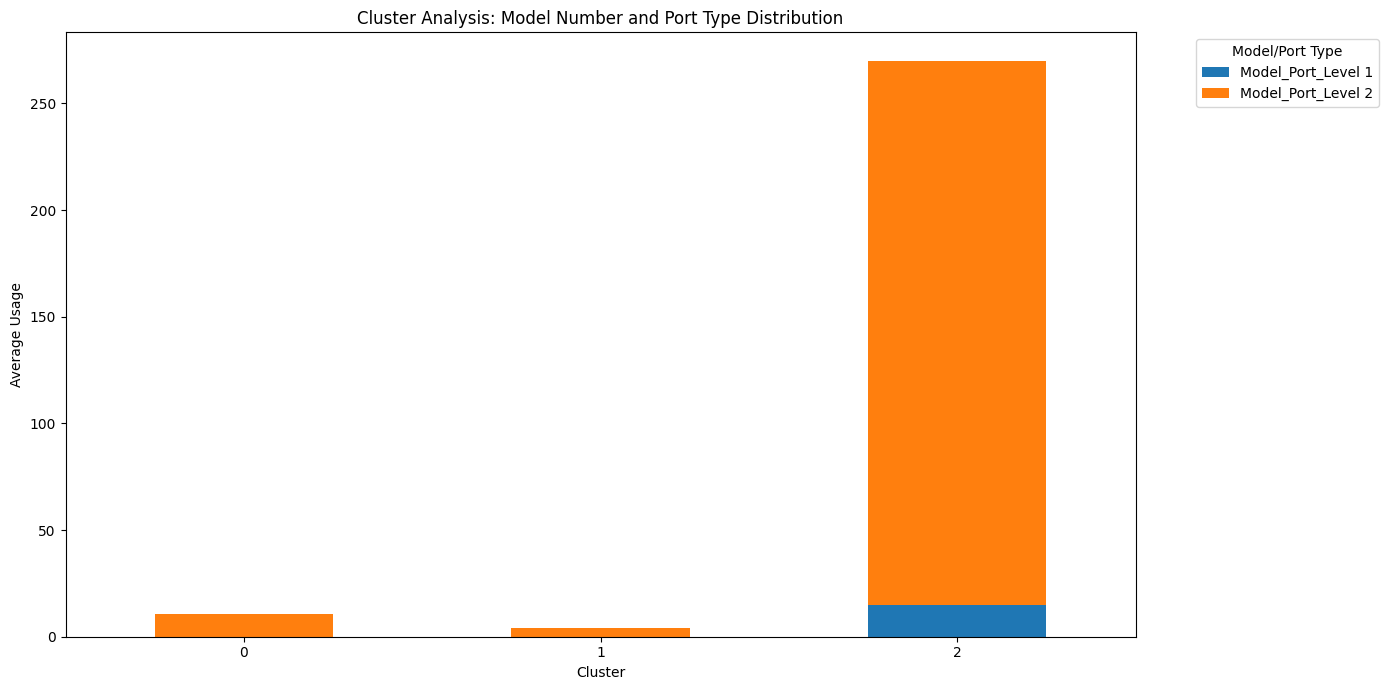

In [ ]:
cluster_model_port_analysis.plot(
    kind='bar',
    figsize=(14, 7),
    stacked=True,
    title="Cluster Analysis: Model Number and Port Type Distribution",
    xlabel="Cluster",
    ylabel="Average Usage"
)

plt.xticks(rotation=0)
plt.legend(title="Model/Port Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Aggregate and Summarize Features by Cluster
- Group the dataset by the Cluster column.
- Calculate the mean for all numeric features.
- Display the summary for each cluster.

                 Hour  Energy (kWh)  Frequency  Charging Duration (hours)  \
Cluster                                                                     
0        1.520244e+18     14.064604   1.019443                   2.788292   
1        1.509689e+18      5.473599   1.012404                   1.273133   
2        1.471625e+18      8.512089   1.011069                   2.291109   

           Level 1     Level 2  
Cluster                         
0         0.062598   10.461659  
1         0.048877    3.805465  
2        15.057803  254.728324  


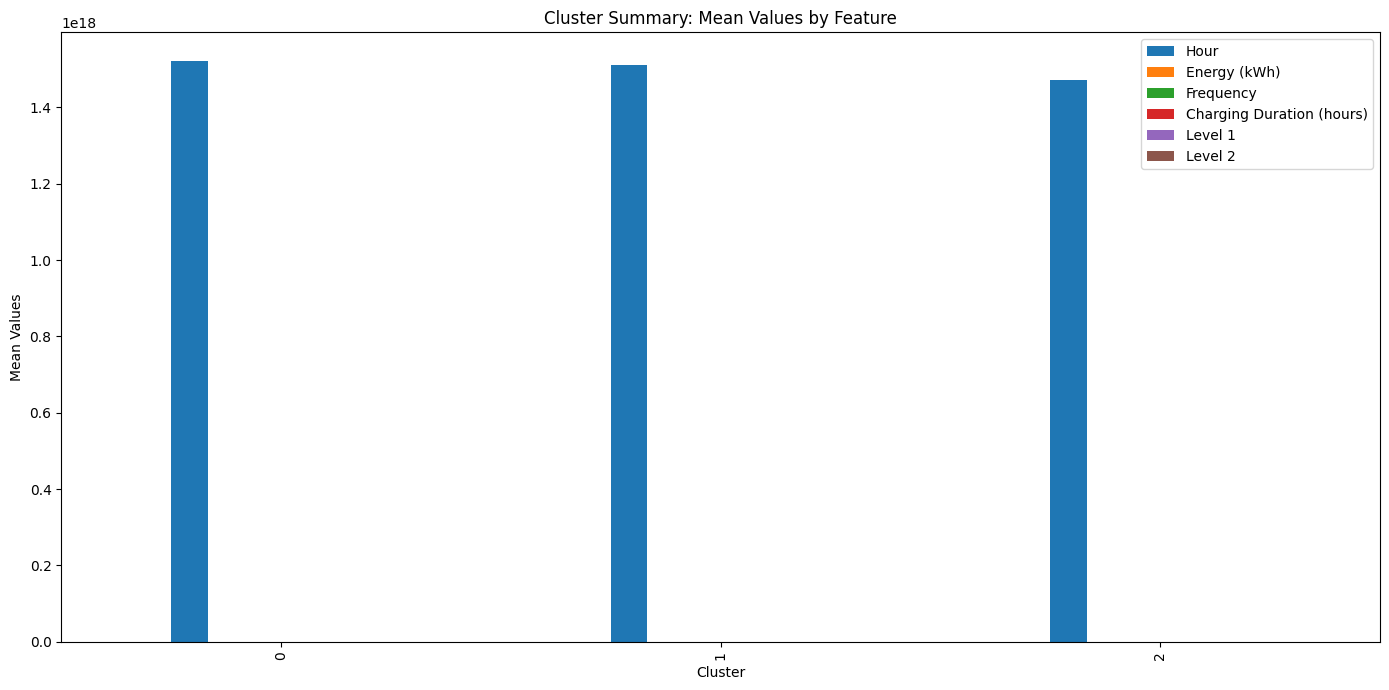

In [ ]:
# Aggregate mean values for all features by cluster
cluster_summary = final_clustering_data_cleaned.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)

# Optional: Visualize the summary to understand the differences between clusters
cluster_summary.plot(kind='bar', figsize=(14, 7), title='Cluster Summary: Mean Values by Feature', legend=True)
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.tight_layout()
plt.show()

In [ ]:
print("Cluster Summary for Model Number and Port Type (Levels 1 and 2):")
display(cluster_model_port_analysis)

Cluster Summary for Model Number and Port Type (Levels 1 and 2):


,Model_Port_Level 1,Model_Port_Level 2
Cluster,,
0,0.062598,10.461659
1,0.048877,3.805465
2,15.057803,254.728324


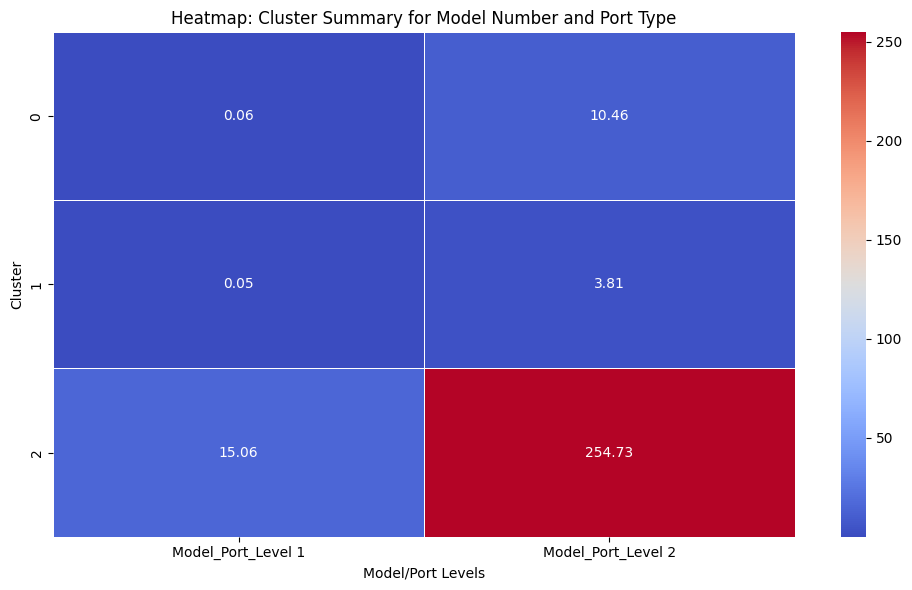

In [ ]:
# Create a heatmap to visualize the cluster summary
plt.figure(figsize=(10, 6))
sns.heatmap(
    cluster_model_port_analysis,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Heatmap: Cluster Summary for Model Number and Port Type")
plt.xlabel("Model/Port Levels")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In the context of this heatmap, **clusters** are groups of users created based on similar usage patterns across several features, such as:

1. **Hourly Energy Use** (`Energy (kWh)`),
2. **Charging Frequency**,
3. **Charging Duration (hours)`,
4. **Model Number and Port Type Usage** (`Model_Port_Level 1` and `Model_Port_Level 2`).

#### What Does Each Cluster Represent?

The clustering process (e.g., using K-Means) grouped users into three categories (Cluster 0, 1, and 2) based on the similarity of their behaviors:

- **Cluster 0:** Represents users with moderate activity and some preference for `Model_Port_Level 2`. These users are not as infrequent as Cluster 1 but also not as heavy users as Cluster 2.
- **Cluster 1:** Represents the least active users. These users interact minimally with both `Model_Port_Level 1` and `Model_Port_Level 2`.
- **Cluster 2:** Represents the most active and engaged users, especially those who heavily use `Model_Port_Level 2`. These users are likely the ones placing the highest demand on the system.

#### How Were the Clusters Defined?
Clusters are defined based on the relationships between features:
1. High `Energy (kWh)`, frequent charging events, and long charging durations are more likely to group users into **Cluster 2**.
2. Sporadic or low interaction with all features results in users being grouped into **Cluster 1**.
3. Intermediate behaviors in all features form **Cluster 0**.

Clusters help identify user behavior patterns within the dataset, such as identifying heavy users, light users, or sporadic users.

### **Station**

#### Grouping user data by charging time and energy consumption

In [ ]:
d = d.set_index('Start Date')

In [ ]:
d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['Station Name', 'date', 'hour'])['Energy (kWh)'].sum().reset_index()

# Pivot table: Rows -> Station Name, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='Station Name', columns='hour', values='Energy (kWh)', fill_value=0)
user_hourly

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.241648,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.828619,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,8.962293,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967


In [ ]:
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.241648,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.828619,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,8.962293,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967


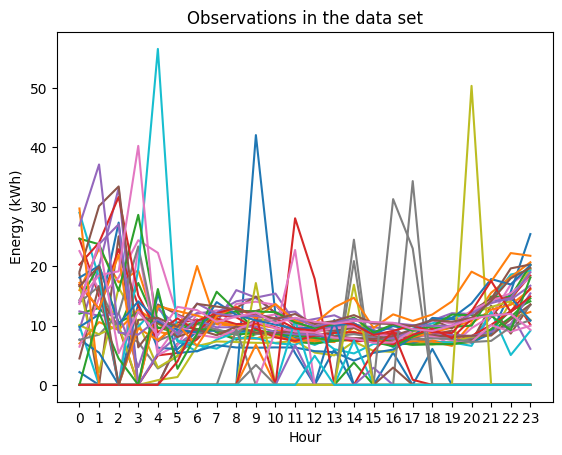

In [ ]:
plt.plot(user_hourly.T)
plt.title('Observations in the data set')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.show()

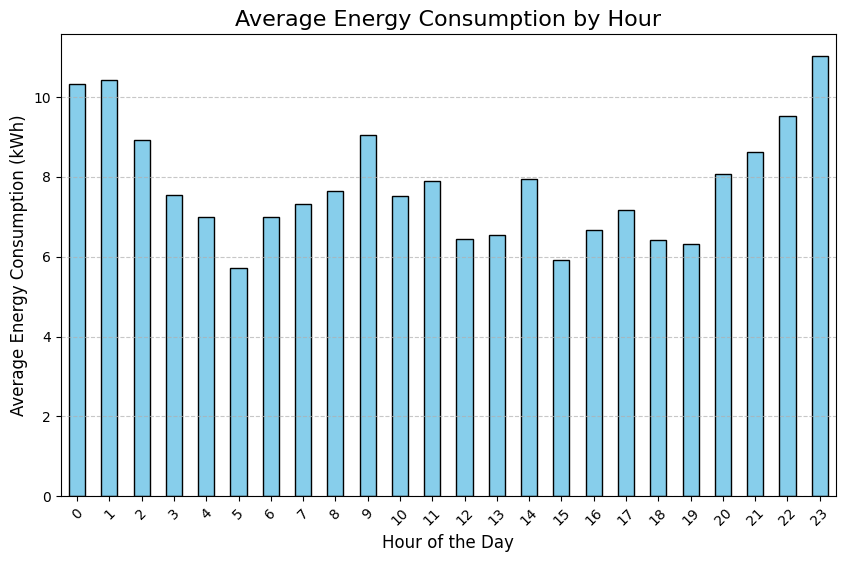

In [ ]:
# Calculate the average energy consumption per hour across all users
hourly_avg_energy = user_hourly.mean(axis=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


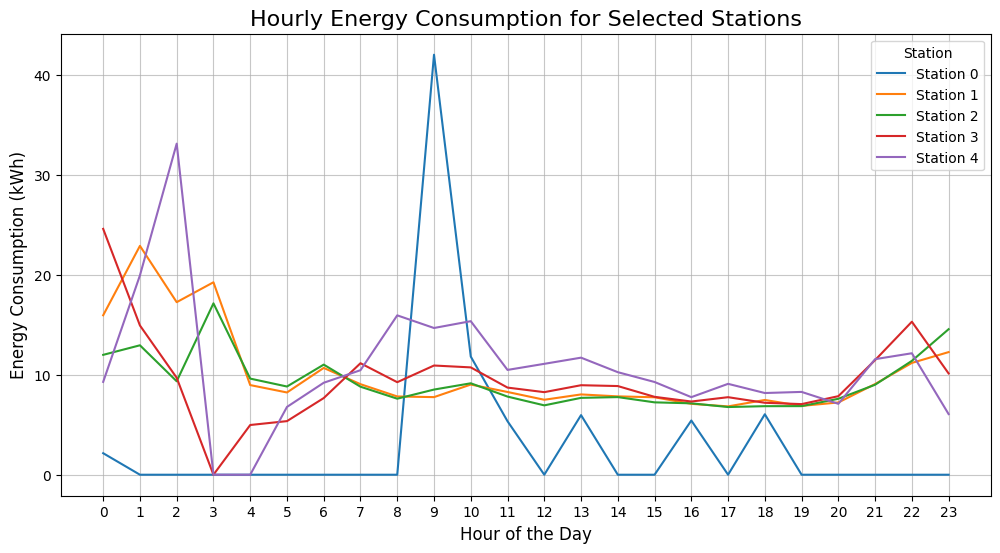

In [ ]:
# Select a subset of users (e.g., first 5 users)
subset_station = user_hourly.head(5)

# Plot energy consumption for selected users
plt.figure(figsize=(12, 6))
for station_name in subset_station.index:
    plt.plot(subset_station.columns, subset_station.loc[station_name], label=f"Station {station_name}")

plt.title("Hourly Energy Consumption for Selected Stations", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title="Station")
plt.grid(alpha=0.7)
plt.show()


#### Clustering for stations

In [ ]:
scaler = MinMaxScaler()
normalized_user_hourly = scaler.fit_transform(user_hourly)

# Convert back to DataFrame
normalized_user_hourly = pd.DataFrame(normalized_user_hourly, 
                                       index=user_hourly.index, 
                                       columns=user_hourly.columns)

In [ ]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(normalized_user_hourly)

# Add cluster labels to the DataFrame
user_hourly['Cluster'] = clusters

# View the resulting DataFrame
print(user_hourly.head())

                      0          1          2          3         4         5  \
Station Name                                                                   
0              2.155000   0.000000   0.000000   0.000000  0.000000  0.000000   
1             15.968664  22.920030  17.281937  19.273235  8.977538  8.237422   
2             12.005408  12.962444   9.358428  17.164327  9.626071  8.833433   
3             24.623062  14.947686   9.709064   0.000000  4.979555  5.367642   
4              9.296000  19.965000  33.159000   0.000000  0.000000  6.788706   

                      6          7          8          9  ...        15  \
Station Name                                              ...             
0              0.000000   0.000000   0.000000  42.064000  ...  0.000000   
1             10.695799   9.067433   7.837912   7.772147  ...  7.756942   
2             11.026872   8.814730   7.614132   8.528849  ...  7.247889   
3              7.677478  11.166891   9.267048  10.936971  ...  7

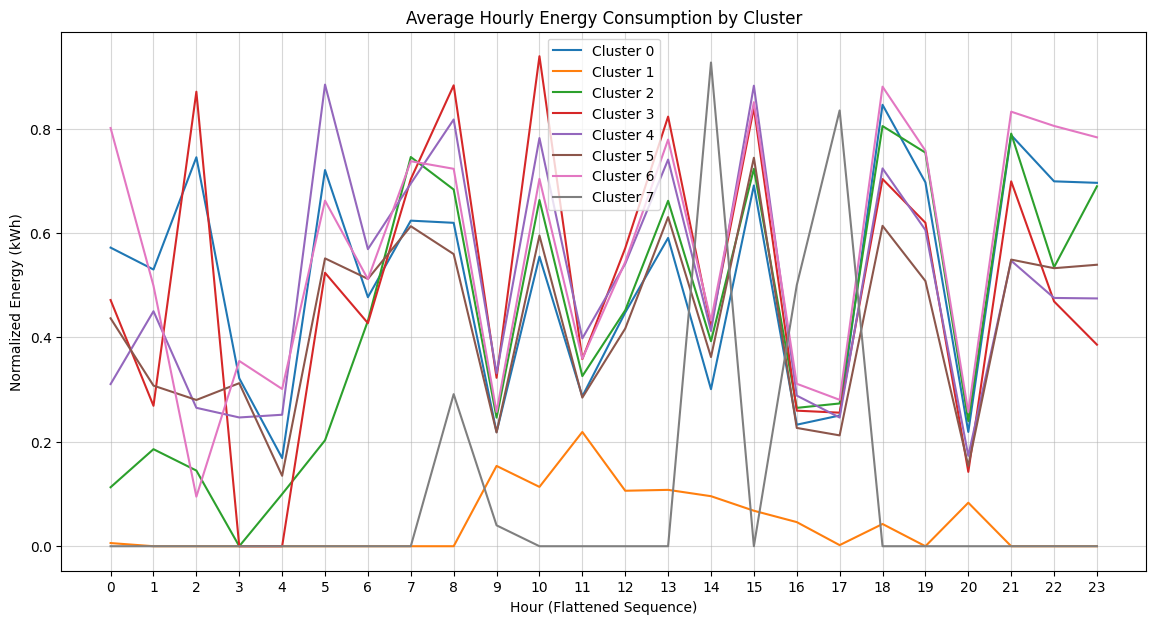

In [ ]:
cluster_hourly_avg = normalized_user_hourly.groupby(user_hourly['Cluster']).mean()

# Plot the average usage patterns per cluster
plt.figure(figsize=(14, 7))
for cluster_id in cluster_hourly_avg.index:
    plt.plot(cluster_hourly_avg.columns, cluster_hourly_avg.loc[cluster_id], label=f"Cluster {cluster_id}")

plt.legend()
plt.title("Average Hourly Energy Consumption by Cluster")
plt.xlabel("Hour (Flattened Sequence)")
plt.ylabel("Normalized Energy (kWh)")
plt.grid(alpha=0.5)
plt.show()

In [ ]:
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231,5
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329,5
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800,5
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000,3
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000,3
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556,6
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983,5
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967,5


In [ ]:
user_hourly = user_hourly.reset_index()

In [ ]:
merged = pd.merge(d[['User ID','Station Name','Transaction Date (Pacific Time)', 'Charging Time (hours)', 'Energy (kWh/h)', 'Longitude', 'Latitude']], user_hourly[['Station Name', 'Cluster']], on='Station Name')
merged

,User ID,Station Name,Transaction Date (Pacific Time),Charging Time (hours),Energy (kWh/h),Longitude,Latitude,Cluster
0,3284.0,12,2011-07-29 23:20:00,1.900833,3.287746,-122.160309,37.444572,5
1,4169.0,12,2011-07-30 00:02:00,0.031667,3.365937,-122.160309,37.444572,5
2,4169.0,12,2011-07-30 12:34:00,4.291111,3.484360,-122.160309,37.444572,5
3,2545.0,12,2011-07-30 16:55:00,2.049444,3.493456,-122.160309,37.444572,5
4,3765.0,12,2011-07-30 20:03:00,0.731667,2.675761,-122.160309,37.444572,5
...,...,...,...,...,...,...,...,...
249846,2024201,42,2020-12-31 17:16:00,0.588333,3.129178,-122.144043,37.428623,2
249847,242661,44,2020-12-31 20:32:00,2.234444,5.703431,-122.158272,37.448284,6
249848,449995,21,2021-01-01 10:57:00,5.136667,5.775146,-122.113510,37.422104,0
249849,804075,44,2020-12-31 21:56:00,3.895000,3.074711,-122.158272,37.448284,6


In [ ]:
merged.set_index('Transaction Date (Pacific Time)', inplace=True)

In [ ]:
merged['day_of_week'] = merged.index.dayofweek
merged.reset_index(inplace=True)
merged.drop('Transaction Date (Pacific Time)', axis=1, inplace=True)
merged

,User ID,Station Name,Charging Time (hours),Energy (kWh/h),Longitude,Latitude,Cluster,day_of_week
0,3284.0,12,1.900833,3.287746,-122.160309,37.444572,5,4
1,4169.0,12,0.031667,3.365937,-122.160309,37.444572,5,5
2,4169.0,12,4.291111,3.484360,-122.160309,37.444572,5,5
3,2545.0,12,2.049444,3.493456,-122.160309,37.444572,5,5
4,3765.0,12,0.731667,2.675761,-122.160309,37.444572,5,5
...,...,...,...,...,...,...,...,...
249846,2024201,42,0.588333,3.129178,-122.144043,37.428623,2,3
249847,242661,44,2.234444,5.703431,-122.158272,37.448284,6,3
249848,449995,21,5.136667,5.775146,-122.113510,37.422104,0,4
249849,804075,44,3.895000,3.074711,-122.158272,37.448284,6,3


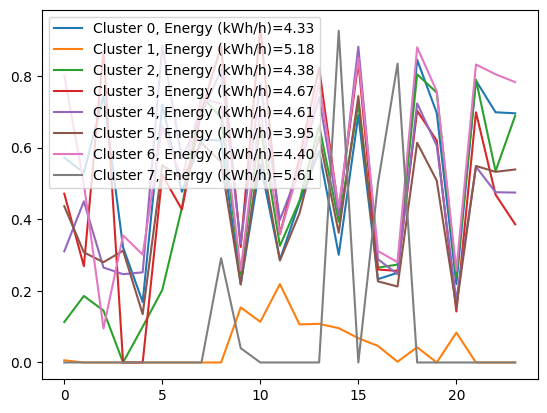

In [ ]:
x=np.arange(0,user_hourly.shape[1]-2)
for i in range(8):
    plt.plot(x, kmeans.cluster_centers_[i], 
             label="Cluster %d, Energy (kWh/h)=%.2f"%(i, np.mean(merged[merged.Cluster==i]['Energy (kWh/h)'])))
plt.legend();

In [ ]:
#Prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = merged.drop(['User ID', 'Energy (kWh/h)', 'Cluster'], axis=1)
y = merged['Energy (kWh/h)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.128138332304905


## Data Analysis and Visualization

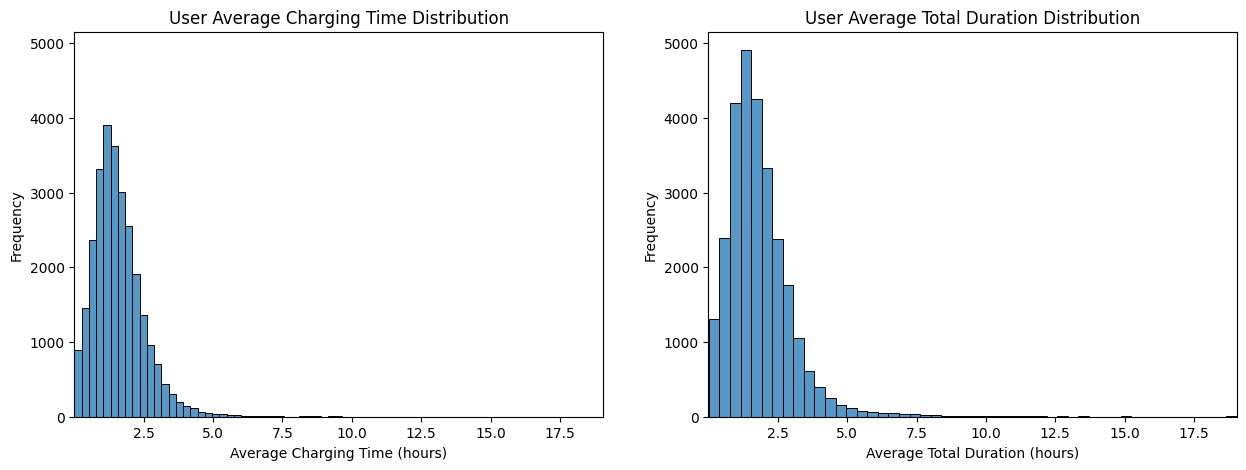

In [ ]:
user_charging_patterns = df.groupby(df.index)['Charging Time (hours)'].mean()
user_duration_patterns = df.groupby(df.index)['Total Duration (hours)'].mean()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(user_charging_patterns, bins=50, ax=axs[0])
axs[0].set_title('User Average Charging Time Distribution')
axs[0].set_xlabel('Average Charging Time (hours)')
axs[0].set_ylabel('Frequency')

sns.histplot(user_duration_patterns, bins=50, ax=axs[1])
axs[1].set_title('User Average Total Duration Distribution')
axs[1].set_xlabel('Average Total Duration (hours)')
axs[1].set_ylabel('Frequency')

x_min = min(user_charging_patterns.min(), user_duration_patterns.min())
x_max = max(user_charging_patterns.max(), user_duration_patterns.max())
y_min, y_max = 0, max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.show()


In [ ]:
df['Total Duration (minutes)']

KeyError: 'Total Duration (minutes)'

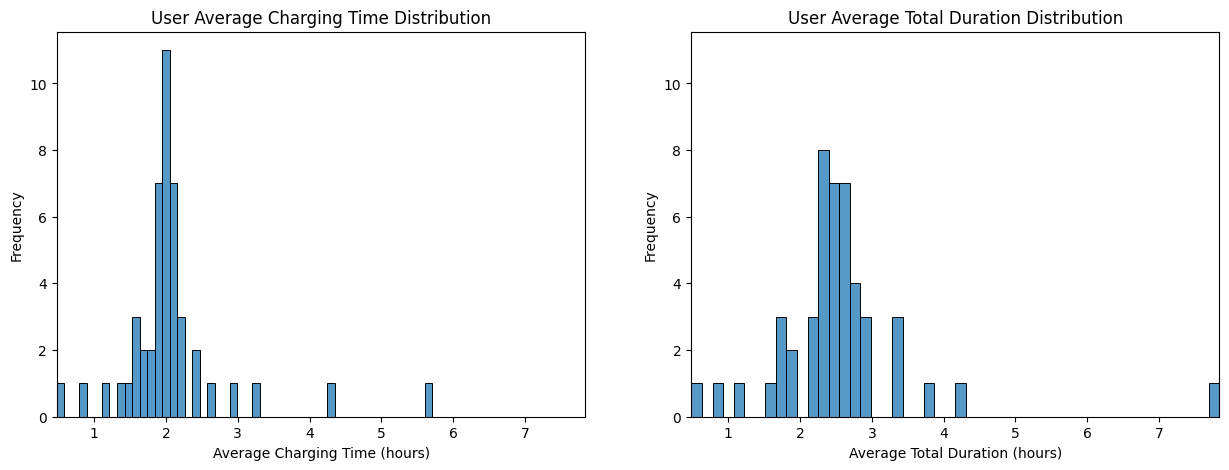

In [ ]:
# Usage by Station Name
station_charging = df.groupby('Station Name')['Charging Time (hours)'].mean()
station_duration = df.groupby('Station Name')['Total Duration (hours)'].mean()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(station_charging, bins=50, ax=axs[0])
axs[0].set_title('User Average Charging Time Distribution')
axs[0].set_xlabel('Average Charging Time (hours)')
axs[0].set_ylabel('Frequency')

sns.histplot(station_duration, bins=50, ax=axs[1])
axs[1].set_title('User Average Total Duration Distribution')
axs[1].set_xlabel('Average Total Duration (hours)')
axs[1].set_ylabel('Frequency')

x_min = min(station_charging.min(), station_duration.min())
x_max = max(station_charging.max(), station_duration.max())
y_min, y_max = 0, max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.show()


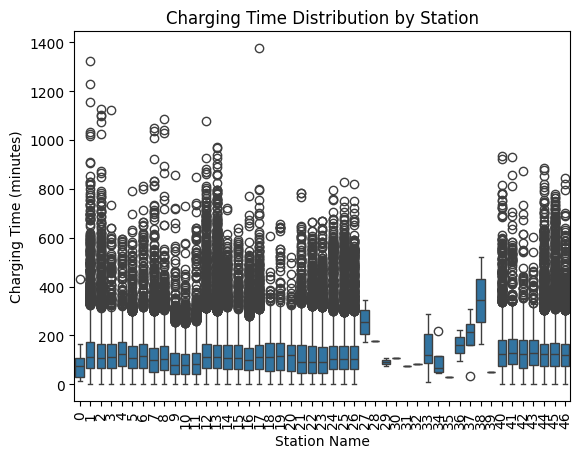

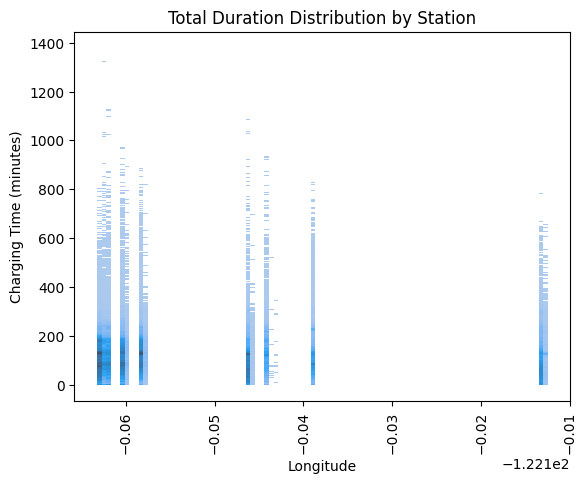

In [ ]:
#Boxplot over usage for each station (no subplot)
sns.boxplot(x='Station Name', y='Charging Time (minutes)', data=df)
plt.xticks(rotation=90)
plt.title('Charging Time Distribution by Station')
plt.show()

sns.histplot(x='Port T', y='Charging Time (minutes)', data=df)
plt.xticks(rotation=90)
plt.title('Total Duration Distribution by Station')
plt.show()

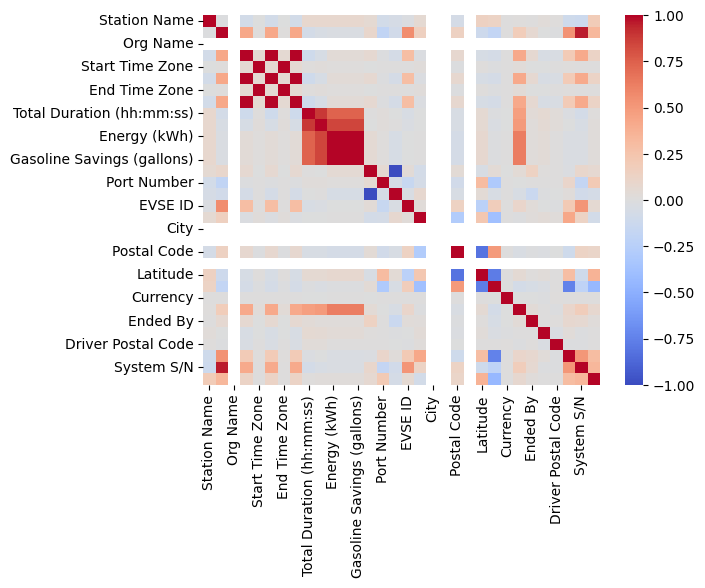

In [ ]:
corr_matrix = df.corr(method='pearson')

# Plot heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

#### Clustering based on 6. Clustering-solutions for stations
----

In [ ]:
df['user'] = df.index
grouped=list(set(df['user'])) 

users={}
for g in grouped:
    users_ts=np.array(df[df.user==g]['Charging Time (hh:mm:ss)'])  # NOTE: For each day we have 96 observations (4 observations each hour is 96 observations each day). Day ts is the vector of observations for each day in grouped 
    users[g]=users_ts

In [ ]:
dfs = [pd.DataFrame({key: value}) for key, value in users.items()]
d_new = pd.concat(dfs, axis=1)
d_new = d_new.transpose()


In [ ]:
#From object to minutes
for col in d_new.columns:
    d_new[col] = pd.to_datetime(d_new[col], format='%H:%M:%S').dt.hour*60 + pd.to_datetime(d_new[col], format='%H:%M:%S').dt.minute

d_new

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
100673,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655385.0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3634621,89,19.0,38.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2883621.0,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,185,184.0,139.0,417.0,163.0,35.0,246.0,54.0,49.0,365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097101.0,36,58.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917461.0,48,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524259.0,43,64.0,94.0,46.0,73.0,103.0,99.0,54.0,95.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131055.0,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d_new = d_new.fillna(0)
d_new

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
100673,227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655385.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3634621,89,19.0,38.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2883621.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4671,185,184.0,139.0,417.0,163.0,35.0,246.0,54.0,49.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097101.0,36,58.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
917461.0,48,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524259.0,43,64.0,94.0,46.0,73.0,103.0,99.0,54.0,95.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131055.0,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


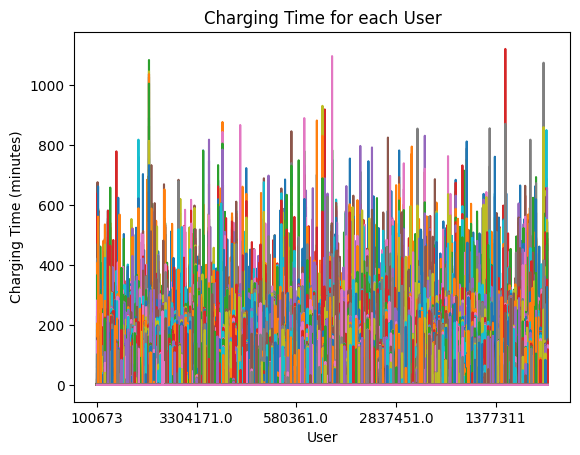

In [ ]:
#plot of the charging time for each user
d_new.plot(legend=False)
plt.xlabel('User')
plt.ylabel('Charging Time (minutes)')
plt.title('Charging Time for each User')
plt.show()


In [ ]:
d_new.iloc[100, :].sum()

133.0

In [ ]:
dt_cluster=d_new                        # Copy data set
ClusterList=np.ones(dt_cluster.shape[0]) # Create a list of cluster
for i in range(0,dt_cluster.shape[0]):
    if dt_cluster.iloc[i,:].sum()>300:
        ClusterList[i]=2

print('List of labels')
ClusterList[:10]

List of labels


array([1., 1., 1., 1., 2., 2., 1., 1., 2., 1.])

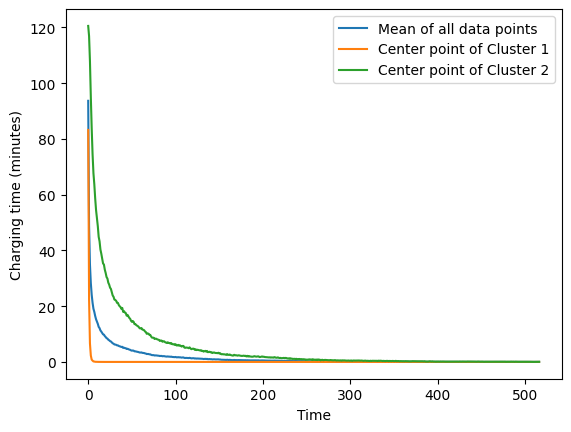

In [ ]:
Center_cluster_1=dt_cluster.iloc[np.where(ClusterList==1)[0],:].mean()
Center_cluster_2=dt_cluster.iloc[np.where(ClusterList==2)[0],:].mean()
plt.plot(dt_cluster.mean())
plt.plot(Center_cluster_1)
plt.plot(Center_cluster_2)
plt.legend(['Mean of all data points','Center point of Cluster 1','Center point of Cluster 2'])
plt.xlabel('Time')
plt.ylabel('Charging time (minutes)')
plt.show()

In [ ]:
def RMSE(x,Y):
    return np.sqrt(((x - Y) ** 2).mean())

# For each observation, compute the error between the centroid of the Cluster 
# (e.g., Center_cluster) and the observation. Assign the observation to the closest cluster

for i in range(0,dt_cluster.shape[1]):
    rmse1=RMSE(dt_cluster.iloc[i,:],Center_cluster_1)
    rmse2=RMSE(dt_cluster.iloc[i,:],Center_cluster_2)
    if rmse1<= rmse2:
        ClusterList[i]=1
    else:
        ClusterList[i]=2
        
New_Center_cluster_1=dt_cluster.iloc[np.where(ClusterList==1)[0],:].mean()
New_Center_cluster_2=dt_cluster.iloc[np.where(ClusterList==2)[0],:].mean()

rmse_c1=RMSE(New_Center_cluster_1,Center_cluster_1)
rmse_c2=RMSE(New_Center_cluster_2,Center_cluster_2)

max_rmse=max(rmse_c1,rmse_c2)
print('The maximum Rmse for the new centroids is:',str(max_rmse))

The maximum Rmse for the new centroids is: 0.1002767784600102


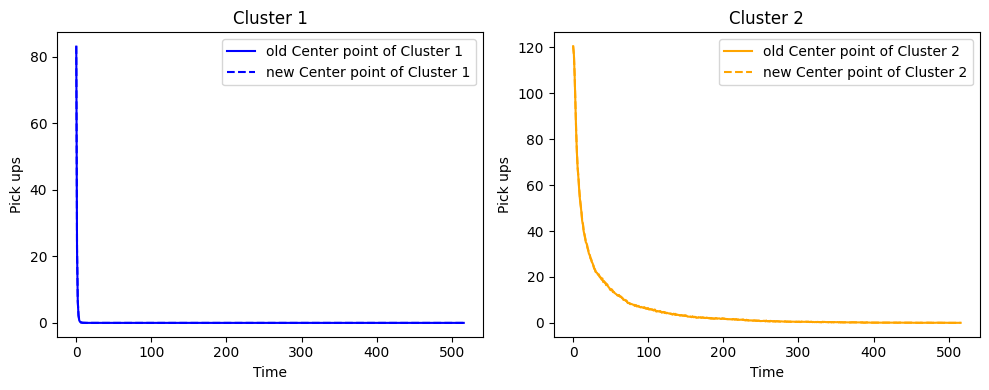

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot the Cluster 1
axs[0].plot(Center_cluster_1,color='Blue', label='old Center point of Cluster 1')
axs[0].plot(New_Center_cluster_1,color='Blue',linestyle='--', label='new Center point of Cluster 1')
axs[0].set_title('Cluster 1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Pick ups')
axs[0].legend()

# Plot the 2
axs[1].plot(Center_cluster_2,color='Orange', label='old Center point of Cluster 2')
axs[1].plot(New_Center_cluster_2,color='Orange',linestyle='--', label='new Center point of Cluster 2')
axs[1].set_title('Cluster 2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Pick ups')
axs[1].legend()
# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans
K=8
k=KMeans(K)
k.fit(d_new)

KMeans()

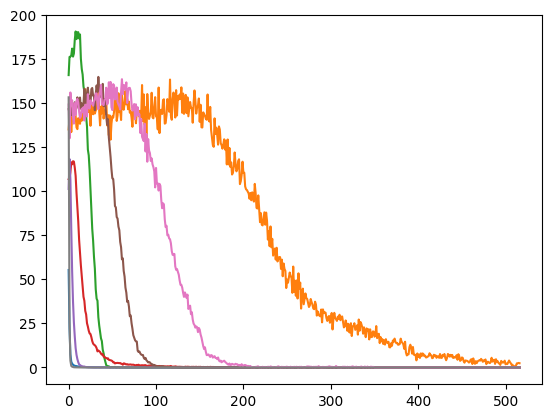

In [ ]:
x=range(517)
for c in k.cluster_centers_:
    plt.plot(x, c)
    

In [ ]:
dt_clusters=d_new.copy()
dt_clusters['cluster']=k.fit_predict(d_new)
dt_clusters

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,cluster
100673,227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
655385.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3634621,89,19.0,38.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2883621.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4671,185,184.0,139.0,417.0,163.0,35.0,246.0,54.0,49.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097101.0,36,58.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
917461.0,48,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
524259.0,43,64.0,94.0,46.0,73.0,103.0,99.0,54.0,95.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
131055.0,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
dt_clusters.index.names=['user']  
dt_clusters=dt_clusters.reset_index()
dt_merged=pd.merge(df[['Station Name', 'Start Date', 'End Date', 'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)', 'Latitude', 'user']], 
                   dt_clusters[['user', 'cluster']], on='user', how='inner') 

dt_merged

,Station Name,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Latitude,user,cluster
0,7,2016-08-01 05:21:00,2016-08-01 06:49:00,2016-08-01 06:49:00,01:27:58,37.426155,523487,5
1,8,2016-08-01 06:01:00,2016-08-01 10:58:00,2016-08-01 10:58:00,04:56:27,37.426182,141845,7
2,7,2016-08-01 06:03:00,2016-08-01 09:15:00,2016-08-01 09:15:00,03:12:17,37.426155,203603,0
3,13,2016-08-01 06:10:00,2016-08-01 08:54:00,2016-08-01 08:54:00,02:44:25,37.444359,126575,5
4,14,2016-08-01 06:13:00,2016-08-01 09:33:00,2016-08-01 09:33:00,03:19:24,37.443558,191743,2
...,...,...,...,...,...,...,...,...
169382,11,2020-12-31 15:51:00,2020-12-31 17:30:00,2020-12-31 17:31:00,01:38:27,37.426228,2652881,6
169383,42,2020-12-31 16:48:00,2020-12-31 20:31:00,2020-12-31 20:32:00,03:43:01,37.448284,242661,2
169384,21,2020-12-31 17:28:00,2021-01-01 10:56:00,2021-01-01 10:57:00,17:28:14,37.422104,449995,2
169385,42,2020-12-31 17:49:00,2020-12-31 21:55:00,2020-12-31 21:56:00,04:05:34,37.448284,804075,5


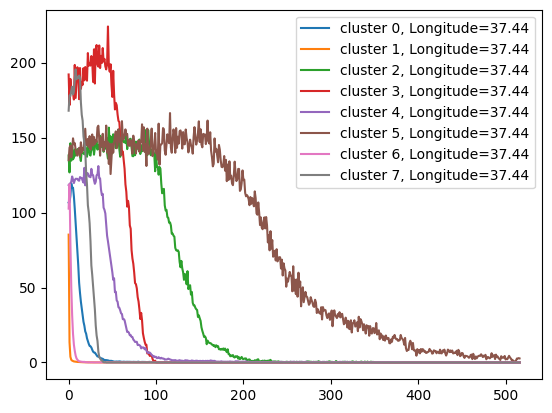

In [ ]:
for i in range(K):
    plt.plot(x, k.cluster_centers_[i], 
             label="cluster %d, Longitude=%.2f"%(i, np.mean(dt_merged[dt_merged.cluster==i]['Latitude'])))
plt.legend();